In [13]:
include("ct_utils.jl")
using DataFrames
using .CTUtils

In [26]:
lines = readlines("si-topcon-dark.eb")
start_idx = findfirst(x -> occursin(r"(?i)bulk", x), lines)
end_idx = findfirst(x -> occursin(r"(?i)interface", x), lines)

if isnothing(start_idx) || isnothing(end_idx) || end_idx <= start_idx
    error("Could not find valid table section.")
end

table_lines = lines[(start_idx+1):(end_idx-1)]

# Remove empty lines
table_lines = filter(x -> !isempty(strip(x)), table_lines)

# Split header using tab delimiter and strip whitespace from each term
header = strip.(split(strip(table_lines[1]), '\t'))

data = [split(strip(line), '\t') for line in table_lines[2:end]]

# Convert data to numbers if possible
data = [map(x -> tryparse(Float64, x) === nothing ? x : parse(Float64, x), row) for row in data]
df_scaps = DataFrame([getindex.(data, i) for i in 1:length(header)], Symbol.(header))

Row,i,x(um),y,Ec(eV),Fn(eV),Fp(eV),Ev(eV),n(/cm3),p(/cm3),rho(defect) (/cm3),net doping (/cm3),rho(/cm3),E(V/cm),jn(mA/cm2),jp(mA/cm2),jn_tunnel(mA/cm2),jp_tunnel(mA/cm2),jtot(mA/cm2),generation(#/cm3.s),recombination(#/cm3.s),cumulative generation (mA/cm2),cumulative recombination L to R (mA/cm2),cumulative recombination R to L (mA/cm2)
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.235607,0.0,0.0,-1.56439,1.12023e16,5.86223e-7,-1.03205e12,1.0e16,-1.20338e15,35793.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0001,0.0,0.235965,0.0,0.0,-1.56403,1.10486e16,5.94381e-7,-1.01789e12,1.0e16,-1.04961e15,35792.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0002,0.0,0.236323,0.0,0.0,-1.56368,1.08968e16,6.02662e-7,-1.0039e12,1.0e16,-8.97774e14,35790.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.000301,0.0,0.236683,0.0,0.0,-1.56332,1.07465e16,6.11091e-7,-9.90056e11,1.0e16,-7.47467e14,35789.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.000402,0.0,0.237045,0.0,0.0,-1.56295,1.05974e16,6.1969e-7,-9.7632e11,1.0e16,-5.98333e14,35788.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.0,0.000504,0.0,0.23741,0.0,0.0,-1.56259,1.04491e16,6.28483e-7,-9.62662e11,1.0e16,-4.50043e14,35787.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,0.000607,0.0,0.237779,0.0,0.0,-1.56222,1.03013e16,6.37497e-7,-9.49052e11,1.0e16,-3.02285e14,35787.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7.0,0.000711,0.0,0.238152,0.0,0.0,-1.56185,1.01538e16,6.46758e-7,-9.35464e11,1.0e16,-1.54766e14,35786.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8.0,0.000817,0.0,0.238532,0.0,0.0,-1.56147,1.00063e16,6.56295e-7,-9.21873e11,1.0e16,-7.20698e12,35786.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


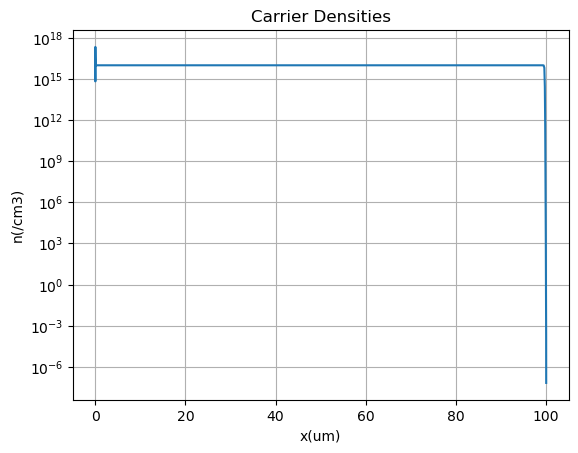

In [31]:
using PyPlot

# Plot x vs. n with logarithmic y-axis using PyPlot
figure()
plot(df_scaps[!, "x(um)"], df_scaps[!, "n(/cm3)"])
yscale("log")
xlabel("x(um)")
ylabel("n(/cm3)")
title("Carrier Densities")
grid(true)
display(gcf())

In [ ]:
function compare_ct_scaps_densities(df_ct::DataFrame, df_scaps::DataFrame)
    # Plotting
    figure(figsize=(10, 6))
    plot(df_ct[!, "x(um)"], df_ct[!, "n(/cm3)"], label="CT", color="blue")
    plot(df_scaps[!, "x(um)"], df_scaps[!, "n(/cm3)"], label="SCAPS", color="orange")
    
    yscale("log")
    xlabel("x(um)")
    ylabel("n(/cm3)")
    title("Comparison of Carrier Densities")
    legend()
    grid(true)
    show()
end